In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

# read data

In [47]:
Df = pd.read_csv('BTC-USD.csv')
Df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


# close price, drop missing values

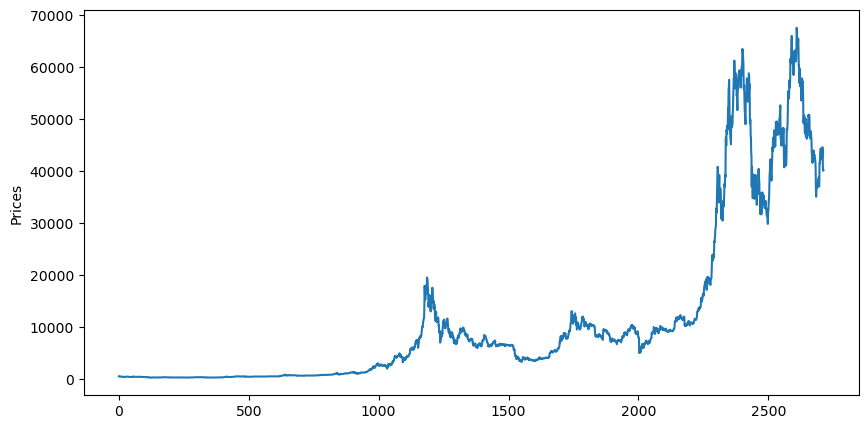

In [49]:
Df=Df[['Close']]
Df= Df.dropna() 
Df.Close.plot(figsize=(10,5))
plt.ylabel("Prices")
plt.show()

# data preprocessing

## calculate the 3 days average stock price, 9 days average and 15 days average stock price and combine as X values

In [50]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df['S_15']= Df['Close'].shift(1).rolling(window=15).mean() 

Df= Df.dropna() 
X = Df[['S_3','S_9','S_15']] 
X.head()

,S_3,S_9,S_15
15,382.008667,399.746884,405.611265
16,381.876994,393.000329,400.127130
17,372.732991,385.923330,395.798596
18,354.483327,376.733551,391.403263
19,336.296000,367.409664,385.510331


# close price as y values

In [51]:
y = Df['Close']
y.head()

15    375.071991
16    359.511993
17    328.865997
18    320.510010
19    330.079010
Name: Close, dtype: float64

# split to training and testing data

In [52]:
t=0.8
t = int(t*len(Df)) 

X_train = X[:t] 
y_train = y[:t]  

X_test = X[t:]
y_test = y[t:]

# train the model

In [53]:
linear = LinearRegression().fit(X_train,y_train)

# prediction


In [54]:
predicted_price = linear.predict(X_test)

In [55]:
df_predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['predicted_price'])  
df_predicted_price


,predicted_price
2173,11403.509390
2174,11419.384386
2175,11572.923542
2176,11628.712235
2177,11808.550655
...,...
2708,42080.774844
2709,42966.062726
2710,43669.535897
2711,42922.835419


# evaluate the model

In [56]:
accuracy = linear.score(X_test, y_test)*100
accuracy 

98.47128834694165

In [57]:
error = mean_squared_error(predicted_price, y_test)
error

3823966.741091864

# visualize

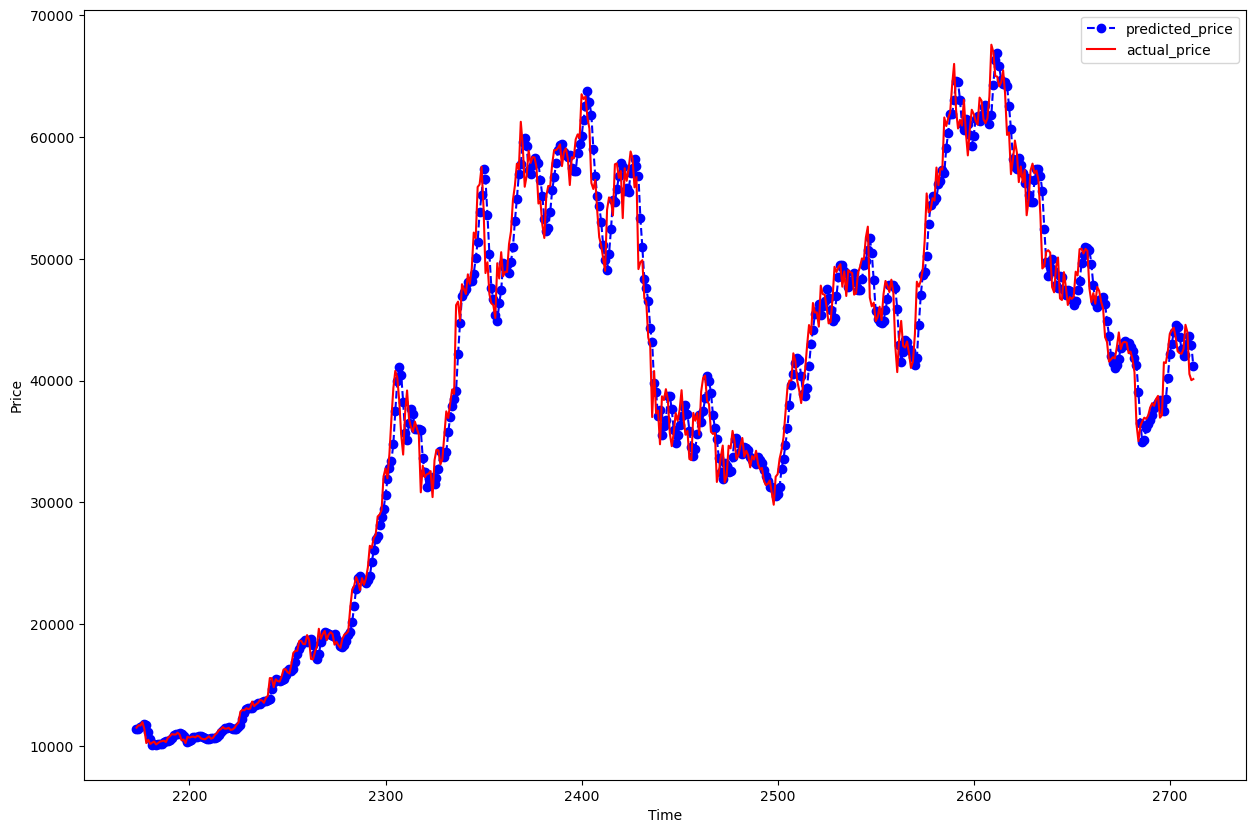

In [58]:
df_predicted_price.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_test.plot(color='red')

plt.legend(['predicted_price','actual_price'])  
plt.xlabel("Time")  
plt.ylabel("Price") 
plt.show()